In [1]:
import numpy as np
from PIL import Image
from IPython.display import display
from lib.utils import *
from lib.utils_morphology import *
from lib.utils_thinning import *

In [2]:
def show_img(img):
    return Image.fromarray(np.uint8(img*255))

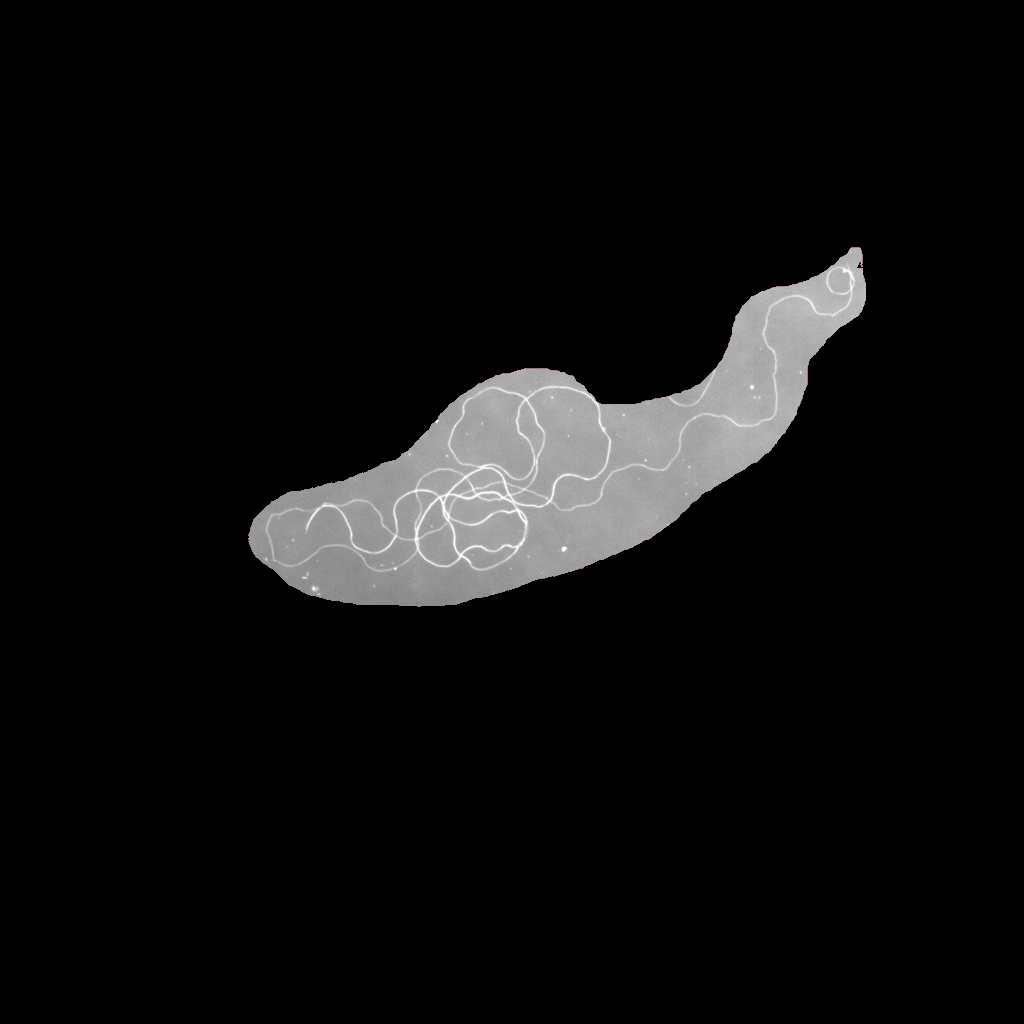

In [51]:
img = Image.open('test.png')
final_result = get_roi(np.array(img.resize((1024, 1024))))
Image.fromarray(np.uint8(final_result))

In [52]:
import time
start_time = time.time()
img_new = Image.fromarray(final_result).convert("L")
test = np.array(img_new)
threshold_img = threshold(test, 185)
res = getKLargestComponents(threshold_img, 2, 0)

res2 = close_img(res, 1)
cc = buildCC2D(res2)
thined = thin(cc, [[150, 0.8]])

end_time = time.time()

# Calculate the difference
execution_time = end_time - start_time

print(f"Execution time: {execution_time} seconds")
print(len(thined[0]))


Execution time: 12.087243556976318 seconds
4505


In [53]:
img = Image.open('test.png')
final_result = get_roi(np.array(img.resize((1024,1024))))

In [54]:
for i in thined[0]:
    final_result[int(i[1]), int(i[0])]=np.array([255, 0, 0])

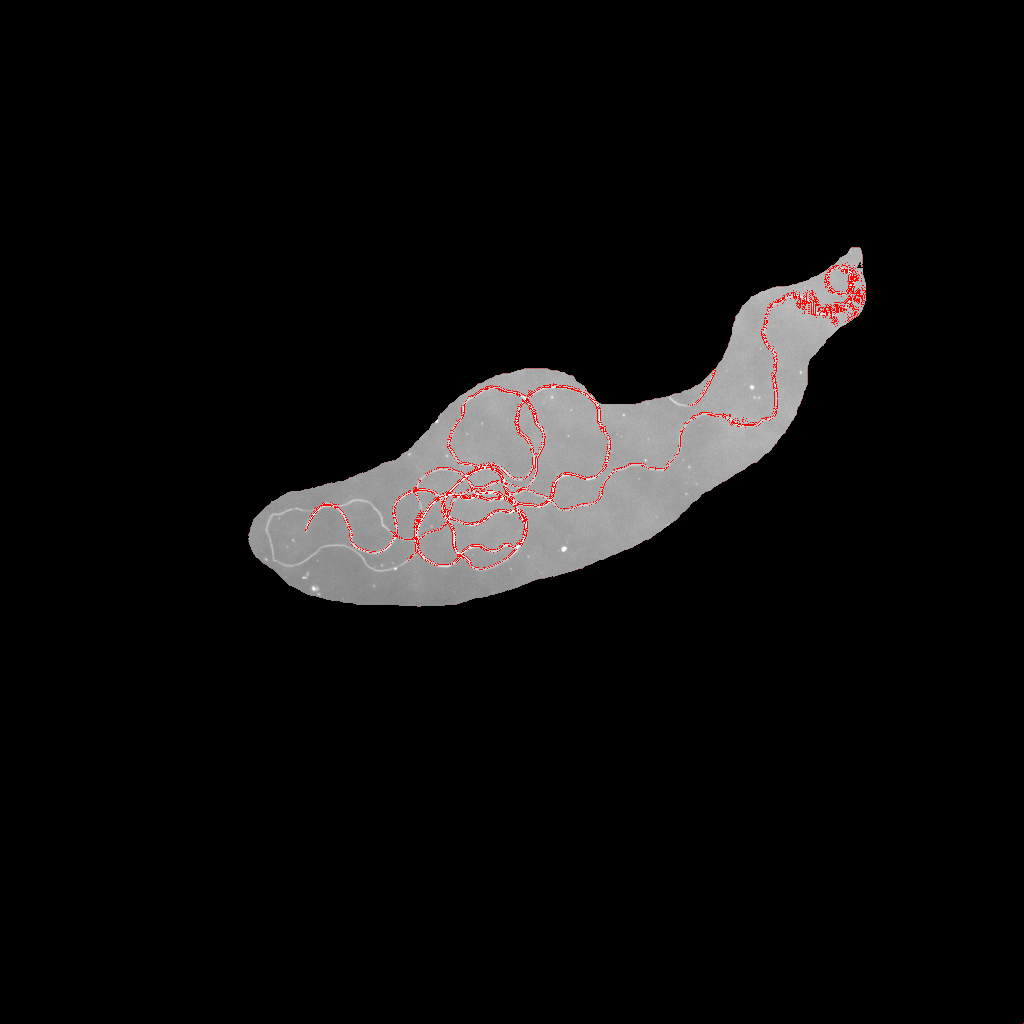

In [55]:
Image.fromarray(np.uint8(final_result))